# Assignment: Estimating Probability with the Beta Distribution



### Table of Content
* [1. Introduction to the Beta Distribution](#1.-Introduction-to-the-Beta_Distribution)
* [2. Problem Statement](#2.-Problem-Statement)
* [3. Visualizing Beta Distributions](#3.-Visualizing-Beta-Distributions)
* [4. Key Insights and Implications of Beta Distribution](#4.-Key-Insights-and-Implications-of-Beta-Distribution)
* [5. Confidence Intervals from Beta Distribution](#5.-Confidence-Intervals-from-Beta-Distribution)
* [6. Simulation of Observations](#6.-Simulation-of-Observations)
* [7. Applications in Real-World Scenarios](#7.-Applications-in-Real-World-Scenarios)
* [8. Conclusion](#8.-Conclusion)

### 1. Introduction to the Beta Distribution
***

The Beta distribution is a continuous probability distribution defined on the interval [0, 1] and parameterized by two positive shape parameters, α (alpha) and β (beta). It is widely used in Bayesian statistics, particularly when modeling probabilities that are unknown or uncertain. The flexibility of the Beta distribution makes it an ideal choice for estimating probabilities because it can take various shapes depending on the values of α and β, reflecting different levels of certainty about a probability estimate.

In this assignment, we will explore the Beta distribution by estimating the probability that a professor wears red t-shirt on any given day based on observed data. We will learn how to calculate the distribution's parameters, visualize it, and interpret its properties at different stages of observation.

#### Formula
The probability mass function of a Beta distributed random variable is defined as:<br>
$$ Beta(x|\alpha,\beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$
where
$$ B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$
and
$$ \Gamma(n) = (n-1)! $$<br>
* $\alpha$ and $\beta$ can be interpreted as the "number of successes" and "number of failures".
* $x$:  Represents the random variable that follows the Beta distribution. It must be in the interval [0, 1]
* $\Gamma$: Gamma function used for normalization.
  
<b>In simple words</b> The Beta distribution is like a way to guess how likely something is to happen. At first, we don’t know much, so our guess is very open. But as we see more things happen, we adjust our guess. The more we see, the better our guess gets! It helps us get more sure about the chance of something happening.


### 2. Problem Statement
***

You are enrolled in a data science course where the professor only wears Red or Blue t-shirt. After a few days, you start wondering about the probability that the professor wears Red t-shirt on any given day. Your observations so far are as follows:

* After 3 days: The professor wore red t-shirt 2 times and blue t-shirt 1 time.
* After 10 days: The professor wore red t-shirt 3 times and blue t-shirt 7 times.
* After 100 days: The professor wore red t-shirt 35 times and blue t-shirt 65 times.
Using the Beta distribution, you will estimate the probability of the professor wearing red t-shirt based on these observations. The goal is to understand how the distribution evolves as more data is collected and how it helps in making more informed probability estimates.

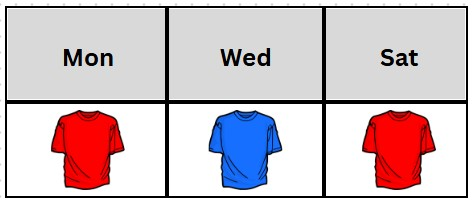

### Parameter Calculation and Explanation
The parameters of the Beta distribution are calculated as follows:

* α (alpha) = Number of observed successes (red t-shirt) + 1
* β (beta) = Number of observed failures (blue t-shirt) + 1

##### Why "+1":
Even before we see anything, the "+1" gives us a tiny head start. It’s like saying, "I think there’s a chance of both outcomes (success or failure) even if I haven't seen any data yet."

#### Example Calculations:

* `After 3 days:` α = 2 (red) + 1 = 3, β = 1 (blue) + 1 = 2
* `After 10 days:` α = 3 (red) + 1 = 4, β = 7 (blue) + 1 = 8
* `After 100 days:` α = 35 (red) + 1 = 36, β = 65 (blue) + 1 = 66

### 3. Visualizing Beta Distributions
***

In [11]:
#Importing all the important libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

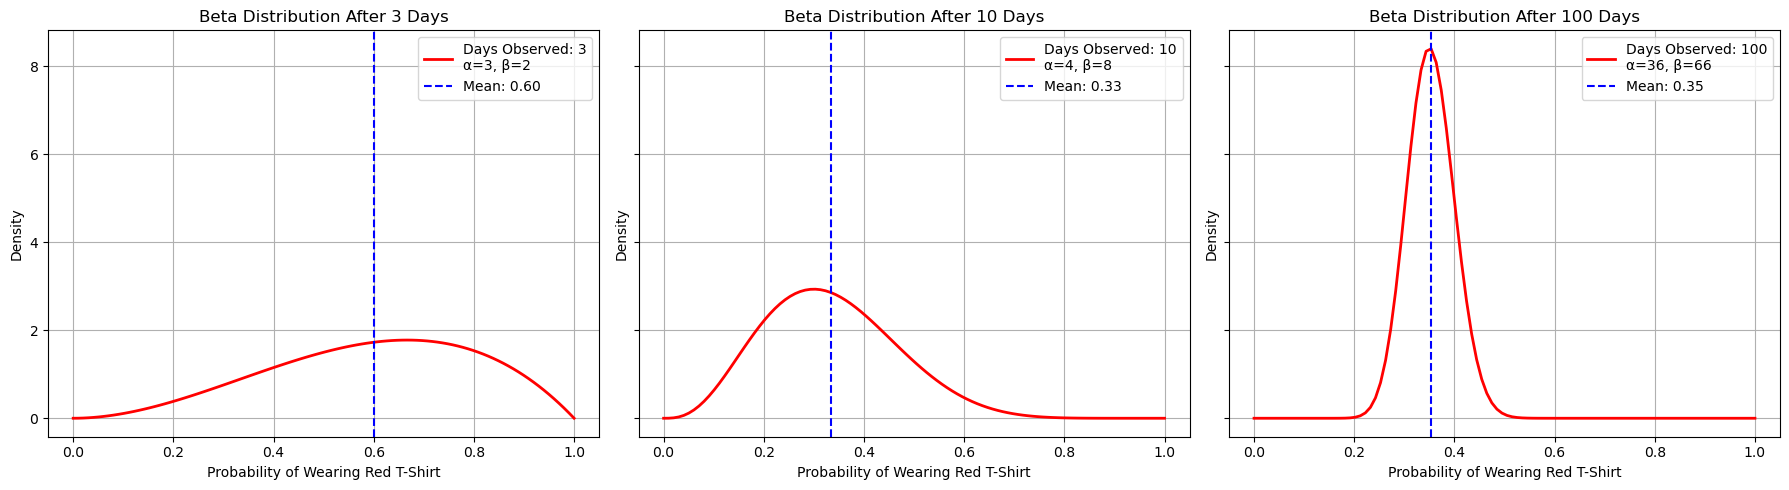

In [12]:
def plot_individual_beta_distribution(ax, days, reds, blues):
    alpha = reds + 1
    beta_param = blues + 1
    
    # x values from 0 to 1
    x = np.linspace(0, 1, 100)
    
    # Probability density function for the beta distribution
    pdf = beta.pdf(x, alpha, beta_param)
    
    # Plotting
    ax.plot(x, pdf, label=f'Days Observed: {days}\nα={alpha}, β={beta_param}', color='red', lw=2)
    ax.axvline(alpha / (alpha + beta_param), color='blue', linestyle='--', label=f'Mean: {alpha / (alpha + beta_param):.2f}')
    ax.set_title(f'Beta Distribution After {days} Days')
    ax.set_xlabel('Probability of Wearing Red T-Shirt')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot on each subplot
plot_individual_beta_distribution(axs[0], 3, 2, 1)    # After 3 days
plot_individual_beta_distribution(axs[1], 10, 3, 7)   # After 10 days
plot_individual_beta_distribution(axs[2], 100, 35, 65) # After 100 days

plt.tight_layout()
plt.show()


### 4. Key Insights and Implications of Beta Distribution
***

##### 1. How does the choice of α and β affect the shape of the distribution?

* The parameters α (alpha) and β (beta) determine the shape of the Beta distribution. Higher values of α and β indicate more confidence in the observed probabilities, resulting in a narrower and more peaked distribution. Lower values create a wider, more uncertain distribution. If α is greater than β, the distribution skews towards higher probabilities, and if β is greater than α, it skews towards lower probabilities.

##### 2. What would happen if the observed probabilities drastically changed after more data was collected?

* If observed probabilities changed significantly with more data, the Beta distribution would adjust accordingly. The distribution would shift its peak toward the new observed probabilities, potentially becoming wider temporarily, reflecting the increased uncertainty until enough data stabilizes the estimate again.

##### 3. Why does the Beta distribution become narrower with more observations?

* As more data is collected, the Beta distribution becomes narrower because the model's uncertainty decreases. The increased number of observations allows the distribution to more precisely estimate the true probability, resulting in a tighter curve with less spread around the mean.

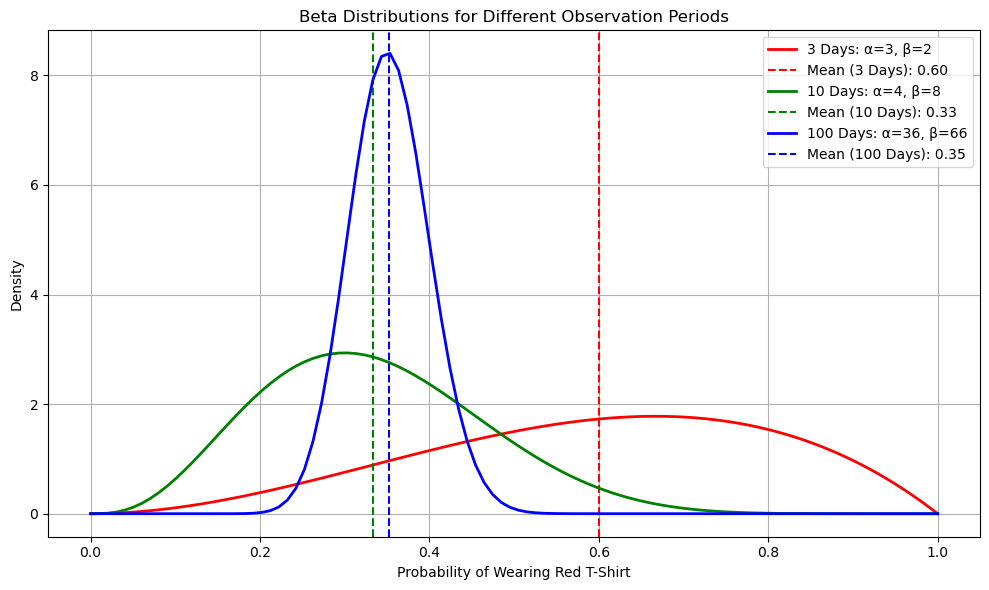

In [16]:
def plot_combined_beta_distribution(ax, distributions):
    x = np.linspace(0, 1, 100)
    
    for days, reds, blues, color in distributions:
        alpha = reds + 1
        beta_param = blues + 1
        
        # Probability density function for the beta distribution
        pdf = beta.pdf(x, alpha, beta_param)
        
        # Plotting
        ax.plot(x, pdf, label=f'{days} Days: α={alpha}, β={beta_param}', color=color, lw=2)
        ax.axvline(alpha / (alpha + beta_param), color=color, linestyle='--', label=f'Mean ({days} Days): {alpha / (alpha + beta_param):.2f}')
    
    ax.set_title('Beta Distributions for Different Observation Periods')
    ax.set_xlabel('Probability of Wearing Red T-Shirt')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the distributions to plot
distributions = [
    (3, 2, 1, 'red'),    # After 3 days
    (10, 3, 7, 'green'), # After 10 days
    (100, 35, 65, 'blue') # After 100 days
]

# Plot all distributions on the same axis
plot_combined_beta_distribution(ax, distributions)

plt.tight_layout()
plt.show()

### 5. Confidence Intervals from Beta Distribution
***

Using <b>[beta.ppf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)</b> function from <b>`scipy.stats`</b> to find the confidence interval. This interval provides a range within which the true probability of the professor wearing red t-shirt is likely to fall with 95% confidence.

In [20]:
# Calculate 95% confidence interval
alpha, beta_val = 36, 66
ci_lower = beta.ppf(0.025, alpha, beta_val)
ci_upper = beta.ppf(0.975, alpha, beta_val)
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")


95% Confidence Interval: (0.264, 0.448)


The 95% confidence interval of (0.264, 0.448) indicates that, based on the observed data and the Beta distribution with parameters α = 36 and β = 66, we are 95% confident that the true probability of the event (e.g., the professor wearing red shoes) lies between 26.4% and 44.8%.

<b>In simple terms:</b> If you watch the professor for many days, you can be pretty sure (95% sure) that he wears a red t-shirt somewhere between about 1 in 4 days and almost half the time. This interval reflects the range where the true likelihood of him wearing red most likely falls, given what we've seen so far.

### 6. Simulation of Observations
***

Simulate 1000 observations of the professor wearing red or blue t-shirt and update the Beta distribution as new data comes in.

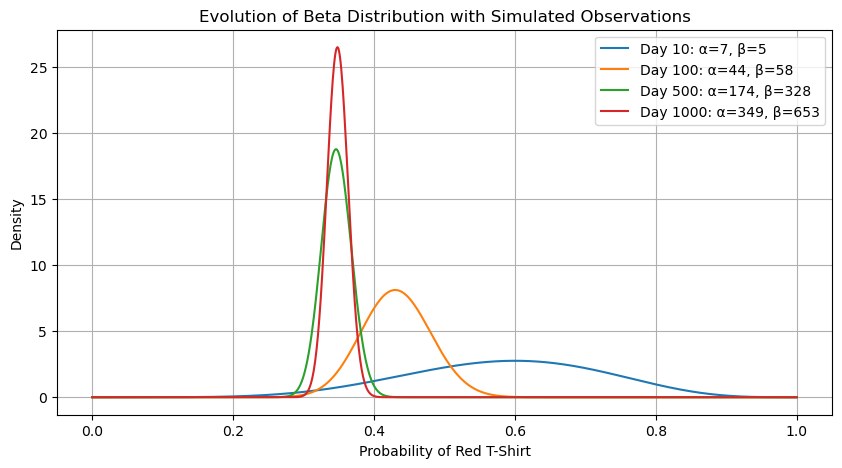

In [25]:
# Set initial parameters
alpha = 1  # Starting value for alpha (prior: 0 red t-shirt)
beta_val = 1  # Starting value for beta (prior: 0 blue t-shirt)
true_probability = 0.35  # Assumed true probability that the professor wears red t-shirt
n_simulations = 1000  # Number of days to simulate

# Simulate observations (1 = red t-shirt, 0 = blue t-shirt)
observations = np.random.binomial(1, true_probability, n_simulations)

# Prepare to plot the evolving distribution
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 5))

# Update Beta distribution with each observation
for i, obs in enumerate(observations, 1):
    # Update the parameters
    alpha += obs  # Increment alpha if the professor wears red t-shirt (obs = 1)
    beta_val += 1 - obs  # Increment beta if the professor wears blue t-shirt (obs = 0)

    # Plot distribution at specific intervals
    if i in [10, 100, 500, n_simulations]:  # Adjust intervals to your preference
        y = beta.pdf(x, alpha, beta_val)
        plt.plot(x, y, label=f'Day {i}: α={alpha}, β={beta_val}')

plt.title('Evolution of Beta Distribution with Simulated Observations')
plt.xlabel('Probability of Red T-Shirt')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


#### Interpretation of the Results
* `Early Stages (10 Days):` The distribution is wide, showing a lot of uncertainty because we have few observations.
* `Middle Stages (100 Days):` It becomes narrower, meaning we are getting more confident about the probability estimate.
* `Later Stages (500 Days):` The distribution is much tighter and centered around the true probability, showing strong confidence.
* `Final Stages (1000 Days):` The distribution is very narrow, indicating very little uncertainty as we've collected a lot of data.

  Overall, more data makes our estimates more precise and reliable.

### 7. Applications in Real-World Scenarios
***
*  When companies run A/B tests to compare two different versions of a webpage, product, or ad campaign, they often measure the conversion rate or click-through rate.
*  Sports analysts often predict the probability of a team winning based on past performance.
*  Estimating the probability of default or failure for loans or financial products.
*  Estimating the probability of a candidate winning an election based on poll data.

### 8. Conclusion
***

We explored how the Beta distribution helps us estimate probabilities using data. We saw that as more data is collected, the distribution becomes narrower, meaning we become more confident in our estimates. The parameters α and β shape the distribution, and as they increase with more observations, our uncertainty reduces. This shows how the Beta distribution adapts with new data, making it a powerful tool for understanding and predicting probabilities in real-world situations.